# Principal Component Analysis (PCA)

Performance without PCA:
Mean Squared Error: 0.0000
R² Score: 0.9949

Performance with PCA:
Mean Squared Error: 0.0000
R² Score: 0.9958


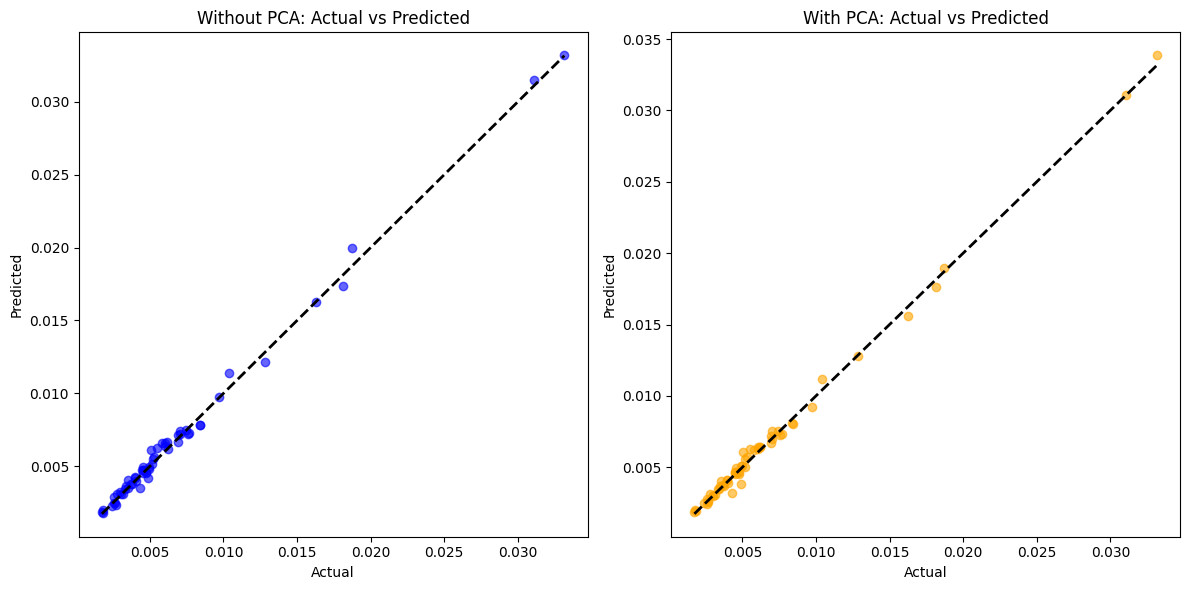

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

# Features (excluding 'name' and 'status', 'name' is an identifier, 'status' is for classification)
X = data.drop(columns=['name', 'status'])

# Use one of the continuous features as the target variable for regression (e.g., 'Jitter(%)')
y = X['MDVP:Jitter(%)']  # Target variable
X = X.drop(columns=['MDVP:Jitter(%)'])  # Exclude the target from the features

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the features (PCA and Linear Regression benefit from standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression without PCA
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_no_pca = lr.predict(X_test_scaled)

# Calculate metrics without PCA
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
r2_no_pca = r2_score(y_test, y_pred_no_pca)

print(f"Performance without PCA:")
print(f"Mean Squared Error: {mse_no_pca:.4f}")
print(f"R² Score: {r2_no_pca:.4f}")

# Apply PCA (let's reduce to 13 principal components)
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression with PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate metrics with PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"\nPerformance with PCA:")
print(f"Mean Squared Error: {mse_pca:.4f}")
print(f"R² Score: {r2_pca:.4f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_no_pca, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Without PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('With PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


# Linear Discriminant Analysis (LDA)

Accuracy without LDA: 0.7
Accuracy with LDA: 0.6166666666666667

Classification Report without LDA:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.72      0.91      0.81        23
           2       0.76      0.62      0.68        21

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.69        60


Classification Report with LDA:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57        16
           1       0.74      0.61      0.67        23
           2       0.73      0.52      0.61        21

    accuracy                           0.62        60
   macro avg       0.64      0.63      0.62        60
weighted avg       0.66      0.62      0.62        60



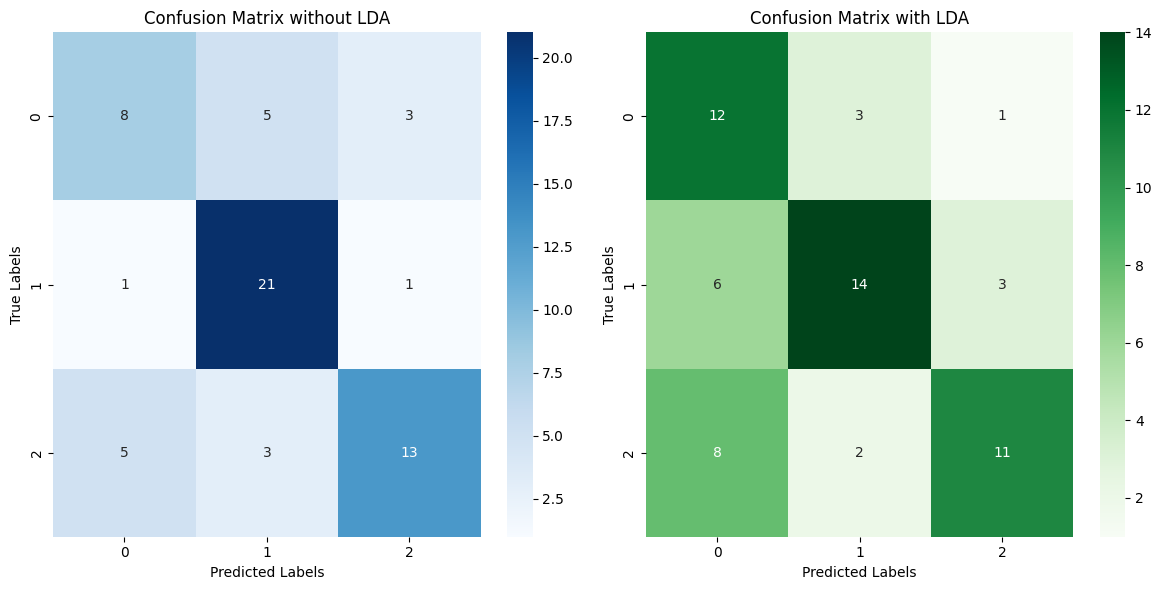

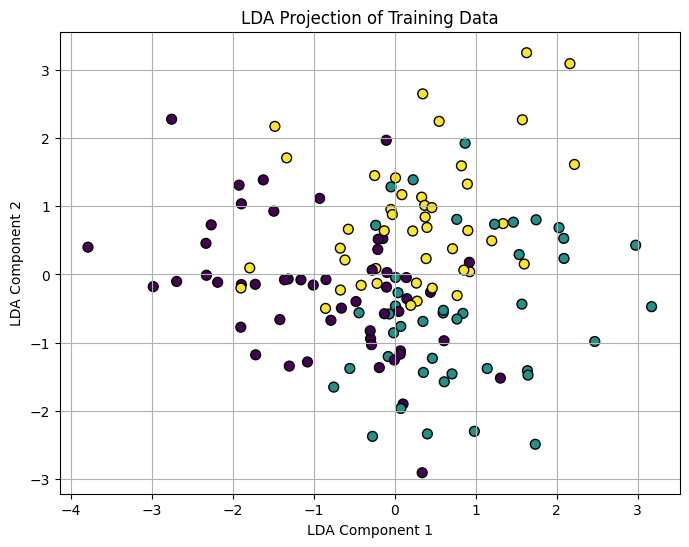

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=200, n_features=10, n_classes=3, n_informative=8, n_redundant=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree without LDA
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_no_lda = clf.predict(X_test)

# Accuracy without LDA
acc_no_lda = accuracy_score(y_test, y_pred_no_lda)

# Apply LDA
lda = LDA(n_components=2)  # Reduce to 2 components for visualization and classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Decision Tree with LDA
clf_lda = DecisionTreeClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)

# Accuracy with LDA
acc_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracy results
print("Accuracy without LDA:", acc_no_lda)
print("Accuracy with LDA:", acc_lda)

# Confusion Matrix
conf_matrix_no_lda = confusion_matrix(y_test, y_pred_no_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred_no_lda))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Without LDA Confusion Matrix
sns.heatmap(conf_matrix_no_lda, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix without LDA')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With LDA Confusion Matrix
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix with LDA')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Visualization of LDA-Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection of Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()


# Independent Component Analysis (ICA)

Silhouette Score without ICA: 0.4373
Silhouette Score with ICA: 0.5674


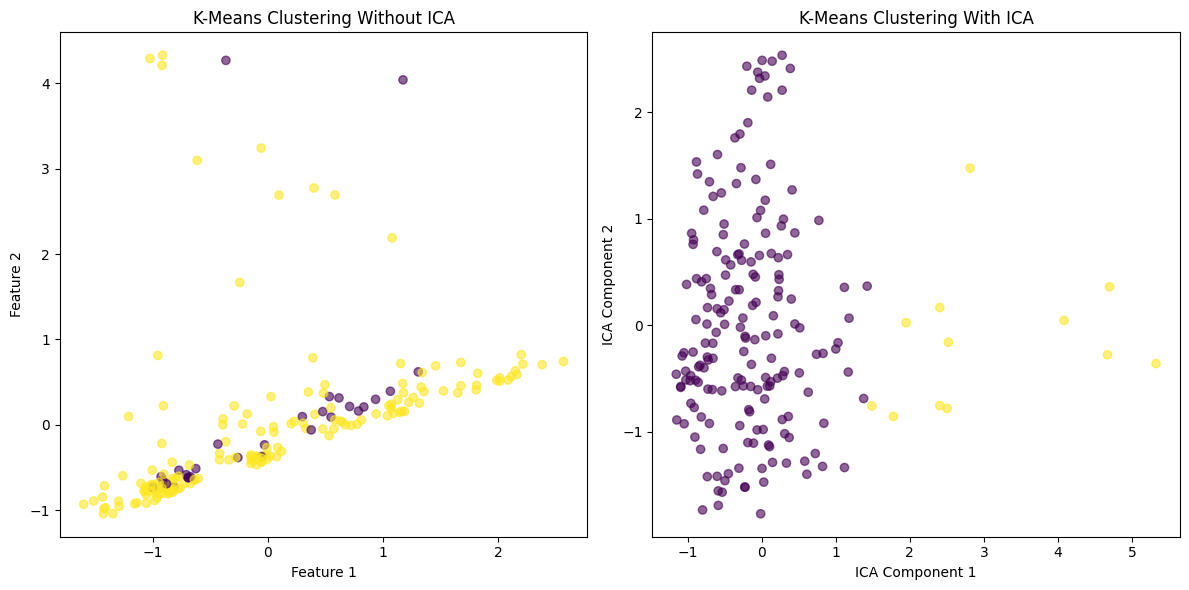

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the UCI Parkinson's dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)


# Features (excluding 'name' and 'status')
X = data.drop(columns=['name', 'status'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering without ICA
kmeans_no_ica = KMeans(n_clusters=2, random_state=42)
kmeans_no_ica.fit(X_scaled)
labels_no_ica = kmeans_no_ica.labels_

# Evaluate clustering performance without ICA using Silhouette Score
silhouette_no_ica = silhouette_score(X_scaled, labels_no_ica)
print(f"Silhouette Score without ICA: {silhouette_no_ica:.4f}")

# Apply ICA to reduce dimensionality
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Apply K-Means clustering on ICA-transformed data
kmeans_ica = KMeans(n_clusters=2, random_state=42)
kmeans_ica.fit(X_ica)
labels_ica = kmeans_ica.labels_

# Evaluate clustering performance with ICA using Silhouette Score
silhouette_ica = silhouette_score(X_ica, labels_ica)
print(f"Silhouette Score with ICA: {silhouette_ica:.4f}")

# Visualizing the clusters before and after ICA (using the first two components)
plt.figure(figsize=(12, 6))

# Before ICA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Without ICA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# After ICA
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering With ICA")
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")

plt.tight_layout()
plt.show()


# Class Assignment

Select a suitable dataset from the UCI Machine Learning Repository (except Parkinson's dataset). Implement various dimensionality reduction techniques (such as PCA, LDA, ICA) and apply Naive Bayes as the subsequent task. Determine which dimensionality reduction technique is the most effective for this dataset, and specify the optimal number of components for that technique.

Performance without PCA:
Mean Squared Error: 0.4096
R² Score: 0.3700

Number of components selected: 9
Explained Variance Ratio (each component): [0.409909   0.17091363 0.09806995 0.07555966 0.06199062 0.05000282
 0.0385644  0.02512202 0.02388646]
Total Explained Variance: 0.9540185647007559

Performance with PCA:
Mean Squared Error: 0.3774
R² Score: 0.4196


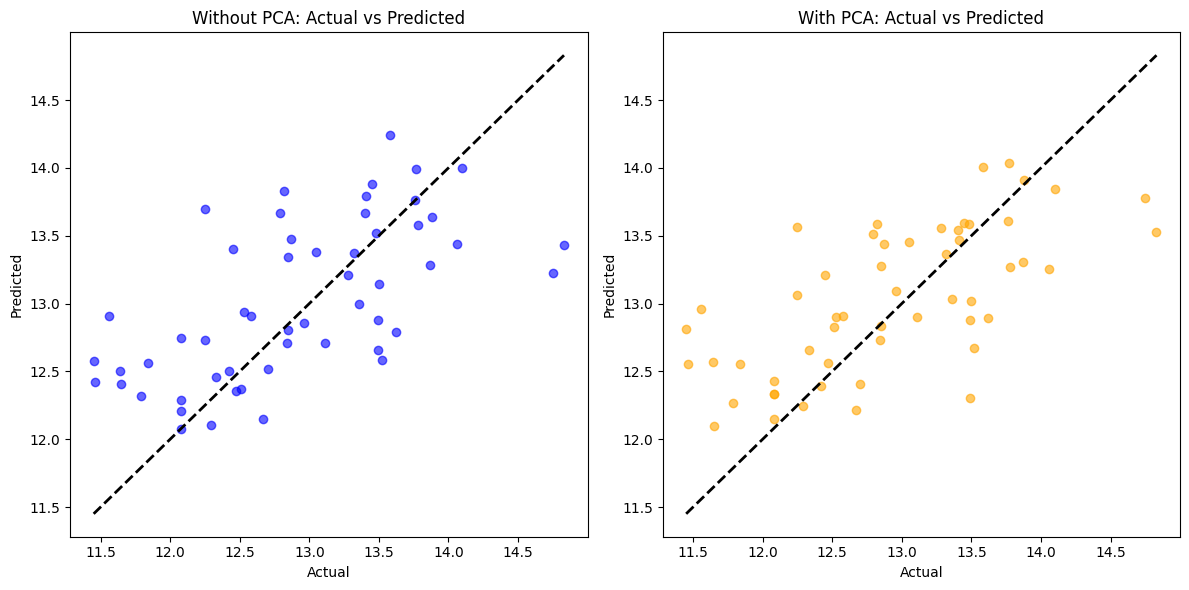

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the UCI Wine dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
           'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=columns)


# Features (X) and target (y)
X = data.drop(columns=['Alcohol'])  # Features excluding 'Alcohol'
y = data['Alcohol']  # 'Alcohol' as the target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Standardize the features (PCA and Linear Regression benefit from standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression without PCA
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_no_pca = lr.predict(X_test_scaled)

# Calculate metrics without PCA
mse_no_pca = mean_squared_error(y_test, y_pred_no_pca)
r2_no_pca = r2_score(y_test, y_pred_no_pca)

print(f"Performance without PCA:")
print(f"Mean Squared Error: {mse_no_pca:.4f}")
print(f"R² Score: {r2_no_pca:.4f}")

# Apply PCA and explain variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nNumber of components selected: {pca.n_components_}")
print(f"Explained Variance Ratio (each component): {pca.explained_variance_ratio_}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_)}")

# Linear Regression with PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate metrics with PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"\nPerformance with PCA:")
print(f"Mean Squared Error: {mse_pca:.4f}")
print(f"R² Score: {r2_pca:.4f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_no_pca, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Without PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('With PCA: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


Accuracy without LDA: 0.9629629629629629
Accuracy with LDA: 0.9814814814814815

Classification Report without LDA:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Classification Report with LDA:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Silhouette Score without LDA: 0.215361951753721
Silhouette Score with LDA: 0.651696928684

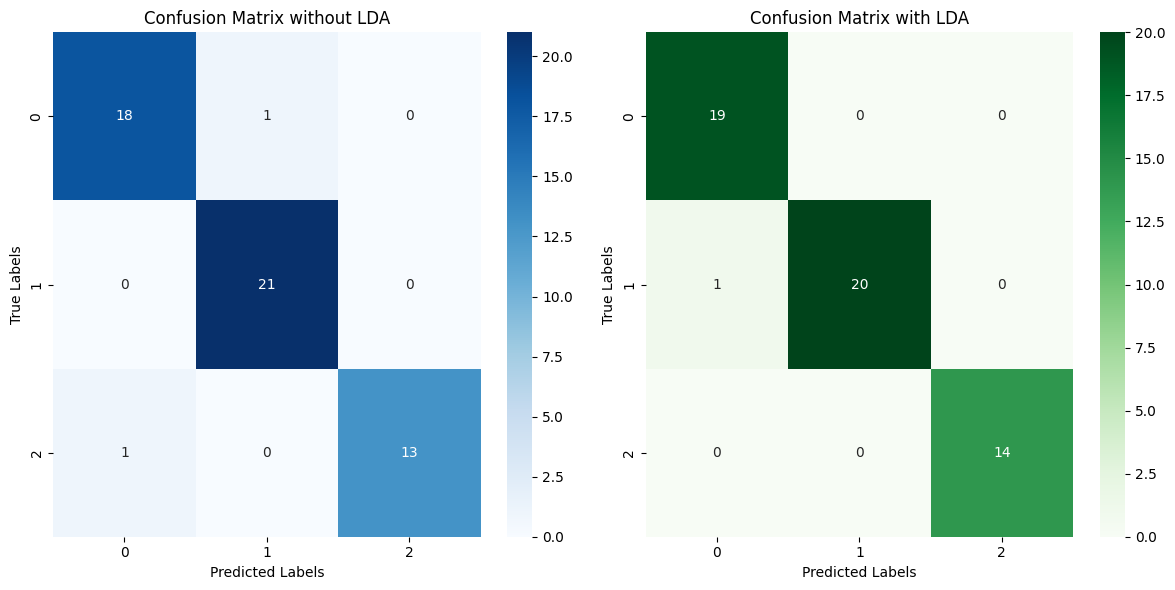

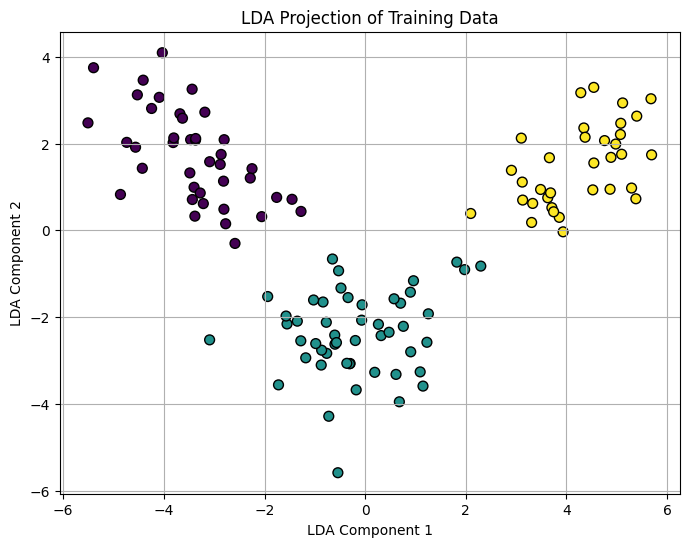

Accuracy with PCA: 0.6666666666666666

Classification Report with PCA:
              precision    recall  f1-score   support

           1       0.77      0.89      0.83        19
           2       0.76      0.62      0.68        21
           3       0.40      0.43      0.41        14

    accuracy                           0.67        54
   macro avg       0.65      0.65      0.64        54
weighted avg       0.67      0.67      0.67        54



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

# Load the UCI Wine dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
           'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=columns)

# Features (X) and target (y)
X = data.drop(columns=['Class'])  # Features excluding 'Class'
y = data['Class']  # 'Class' as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree without LDA
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_no_lda = clf.predict(X_test)

# Accuracy without LDA
acc_no_lda = accuracy_score(y_test, y_pred_no_lda)

# Apply LDA
n_components_lda = 2  # Change this to experiment with different numbers of components
lda = LDA(n_components=n_components_lda)  # Reduce to 2 components for visualization and classification
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Decision Tree with LDA
clf_lda = DecisionTreeClassifier(random_state=42)
clf_lda.fit(X_train_lda, y_train)
y_pred_lda = clf_lda.predict(X_test_lda)

# Accuracy with LDA
acc_lda = accuracy_score(y_test, y_pred_lda)

# Print the accuracy results
print("Accuracy without LDA:", acc_no_lda)
print("Accuracy with LDA:", acc_lda)

# Confusion Matrix
conf_matrix_no_lda = confusion_matrix(y_test, y_pred_no_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Classification Report
print("\nClassification Report without LDA:")
print(classification_report(y_test, y_pred_no_lda))

print("\nClassification Report with LDA:")
print(classification_report(y_test, y_pred_lda))

# Silhouette Score
if n_components_lda == 2:  # Silhouette score is meaningful for clustering-type tasks, so 2D works well
    silhouette_no_lda = silhouette_score(X_test, y_pred_no_lda)
    silhouette_lda = silhouette_score(X_test_lda, y_pred_lda)
    print("\nSilhouette Score without LDA:", silhouette_no_lda)
    print("Silhouette Score with LDA:", silhouette_lda)

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Without LDA Confusion Matrix
sns.heatmap(conf_matrix_no_lda, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix without LDA')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# With LDA Confusion Matrix
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix with LDA')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Visualization of LDA-Transformed Data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('LDA Projection of Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
plt.show()

# Apply PCA for comparison
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Decision Tree with PCA
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

# Accuracy with PCA
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", acc_pca)

# Confusion Matrix and Classification Report for PCA
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print("\nClassification Report with PCA:")
print(classification_report(y_test, y_pred_pca))
# Plot PCA Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix with PCA')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Silhouette Score with PCA
silhouette_pca = silhouette_score(X_test_pca, y_pred_pca)
print("\nSilhouette Score with PCA:", silhouette_pca)

Silhouette Score without ICA: 0.2849
Silhouette Score with ICA: 0.5795


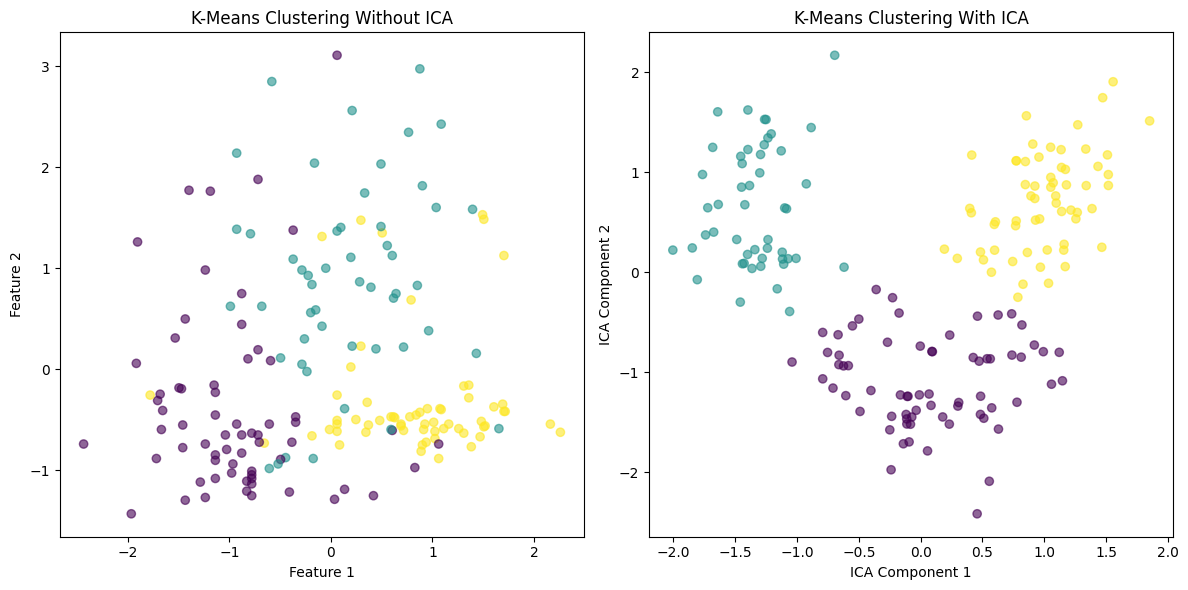

Inertia without ICA: 1277.9285
Adjusted Rand Index without ICA: 0.8975
Davies-Bouldin Score without ICA: 1.3892
Inertia with ICA: 76.0880
Adjusted Rand Index with ICA: 0.9122
Davies-Bouldin Score with ICA: 0.5691

Evaluation Summary:
Silhouette Score without ICA: 0.2849
Inertia without ICA: 1277.9285
ARI without ICA: 0.8975
Davies-Bouldin Score without ICA: 1.3892

Silhouette Score with ICA: 0.5795
Inertia with ICA: 76.0880
ARI with ICA: 0.9122
Davies-Bouldin Score with ICA: 0.5691


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the UCI Wine dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
           'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=columns)

# Features (excluding 'Class')
X = data.drop(columns=['Class'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering without ICA
kmeans_no_ica = KMeans(n_clusters=3, random_state=42)  # Wine dataset has 3 classes, so n_clusters = 3
kmeans_no_ica.fit(X_scaled)
labels_no_ica = kmeans_no_ica.labels_

# Evaluate clustering performance without ICA using Silhouette Score
silhouette_no_ica = silhouette_score(X_scaled, labels_no_ica)
print(f"Silhouette Score without ICA: {silhouette_no_ica:.4f}")

# Apply ICA to reduce dimensionality
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Apply K-Means clustering on ICA-transformed data
kmeans_ica = KMeans(n_clusters=3, random_state=42)  # Wine dataset has 3 classes, so n_clusters = 3
kmeans_ica.fit(X_ica)
labels_ica = kmeans_ica.labels_

# Evaluate clustering performance with ICA using Silhouette Score
silhouette_ica = silhouette_score(X_ica, labels_ica)
print(f"Silhouette Score with ICA: {silhouette_ica:.4f}")

# Visualizing the clusters before and after ICA (using the first two components)
plt.figure(figsize=(12, 6))

# Before ICA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering Without ICA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# After ICA
plt.subplot(1, 2, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering With ICA")
plt.xlabel("ICA Component 1")
plt.ylabel("ICA Component 2")

plt.tight_layout()
plt.show()
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score

# Add inertia (sum of squared distances) for K-Means without ICA
inertia_no_ica = kmeans_no_ica.inertia_
print(f"Inertia without ICA: {inertia_no_ica:.4f}")

# Adjusted Rand Index without ICA (using true class labels for comparison)
ari_no_ica = adjusted_rand_score(data['Class'], labels_no_ica)
print(f"Adjusted Rand Index without ICA: {ari_no_ica:.4f}")

# Davies-Bouldin score without ICA
db_score_no_ica = davies_bouldin_score(X_scaled, labels_no_ica)
print(f"Davies-Bouldin Score without ICA: {db_score_no_ica:.4f}")

# Add inertia for K-Means with ICA
inertia_ica = kmeans_ica.inertia_
print(f"Inertia with ICA: {inertia_ica:.4f}")

# Adjusted Rand Index with ICA
ari_ica = adjusted_rand_score(data['Class'], labels_ica)
print(f"Adjusted Rand Index with ICA: {ari_ica:.4f}")

# Davies-Bouldin score with ICA
db_score_ica = davies_bouldin_score(X_ica, labels_ica)
print(f"Davies-Bouldin Score with ICA: {db_score_ica:.4f}")

# Final evaluation metrics output
print("\nEvaluation Summary:")
print(f"Silhouette Score without ICA: {silhouette_no_ica:.4f}")
print(f"Inertia without ICA: {inertia_no_ica:.4f}")
print(f"ARI without ICA: {ari_no_ica:.4f}")
print(f"Davies-Bouldin Score without ICA: {db_score_no_ica:.4f}\n")

print(f"Silhouette Score with ICA: {silhouette_ica:.4f}")
print(f"Inertia with ICA: {inertia_ica:.4f}")
print(f"ARI with ICA: {ari_ica:.4f}")
print(f"Davies-Bouldin Score with ICA: {db_score_ica:.4f}")


***Results are better after ICA application.***
*   For Interia lower value is better, after applying ICA we are getting lower value of ICA i.e 76.0880.It measures internal coherence of the clusters.
*   For ARI higher value is better which is 0.9122 after application of ICA. It measures similarity of predicted clusters with true class labels.
*   For Davies-Bouldin lower value is better, after applying ICA we are getting lower score i.e 0.5691.It signifies compactness of clusters.






Naive Bayes Accuracy: 1.0000


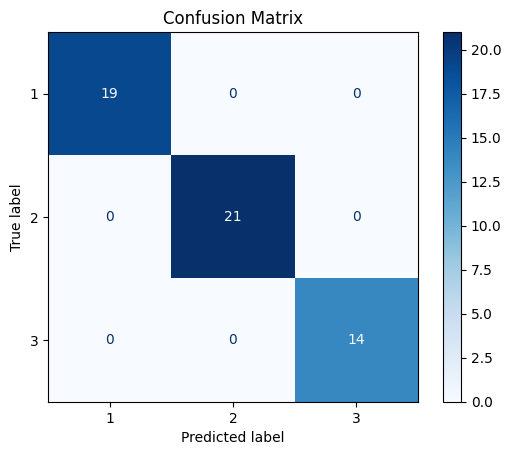

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

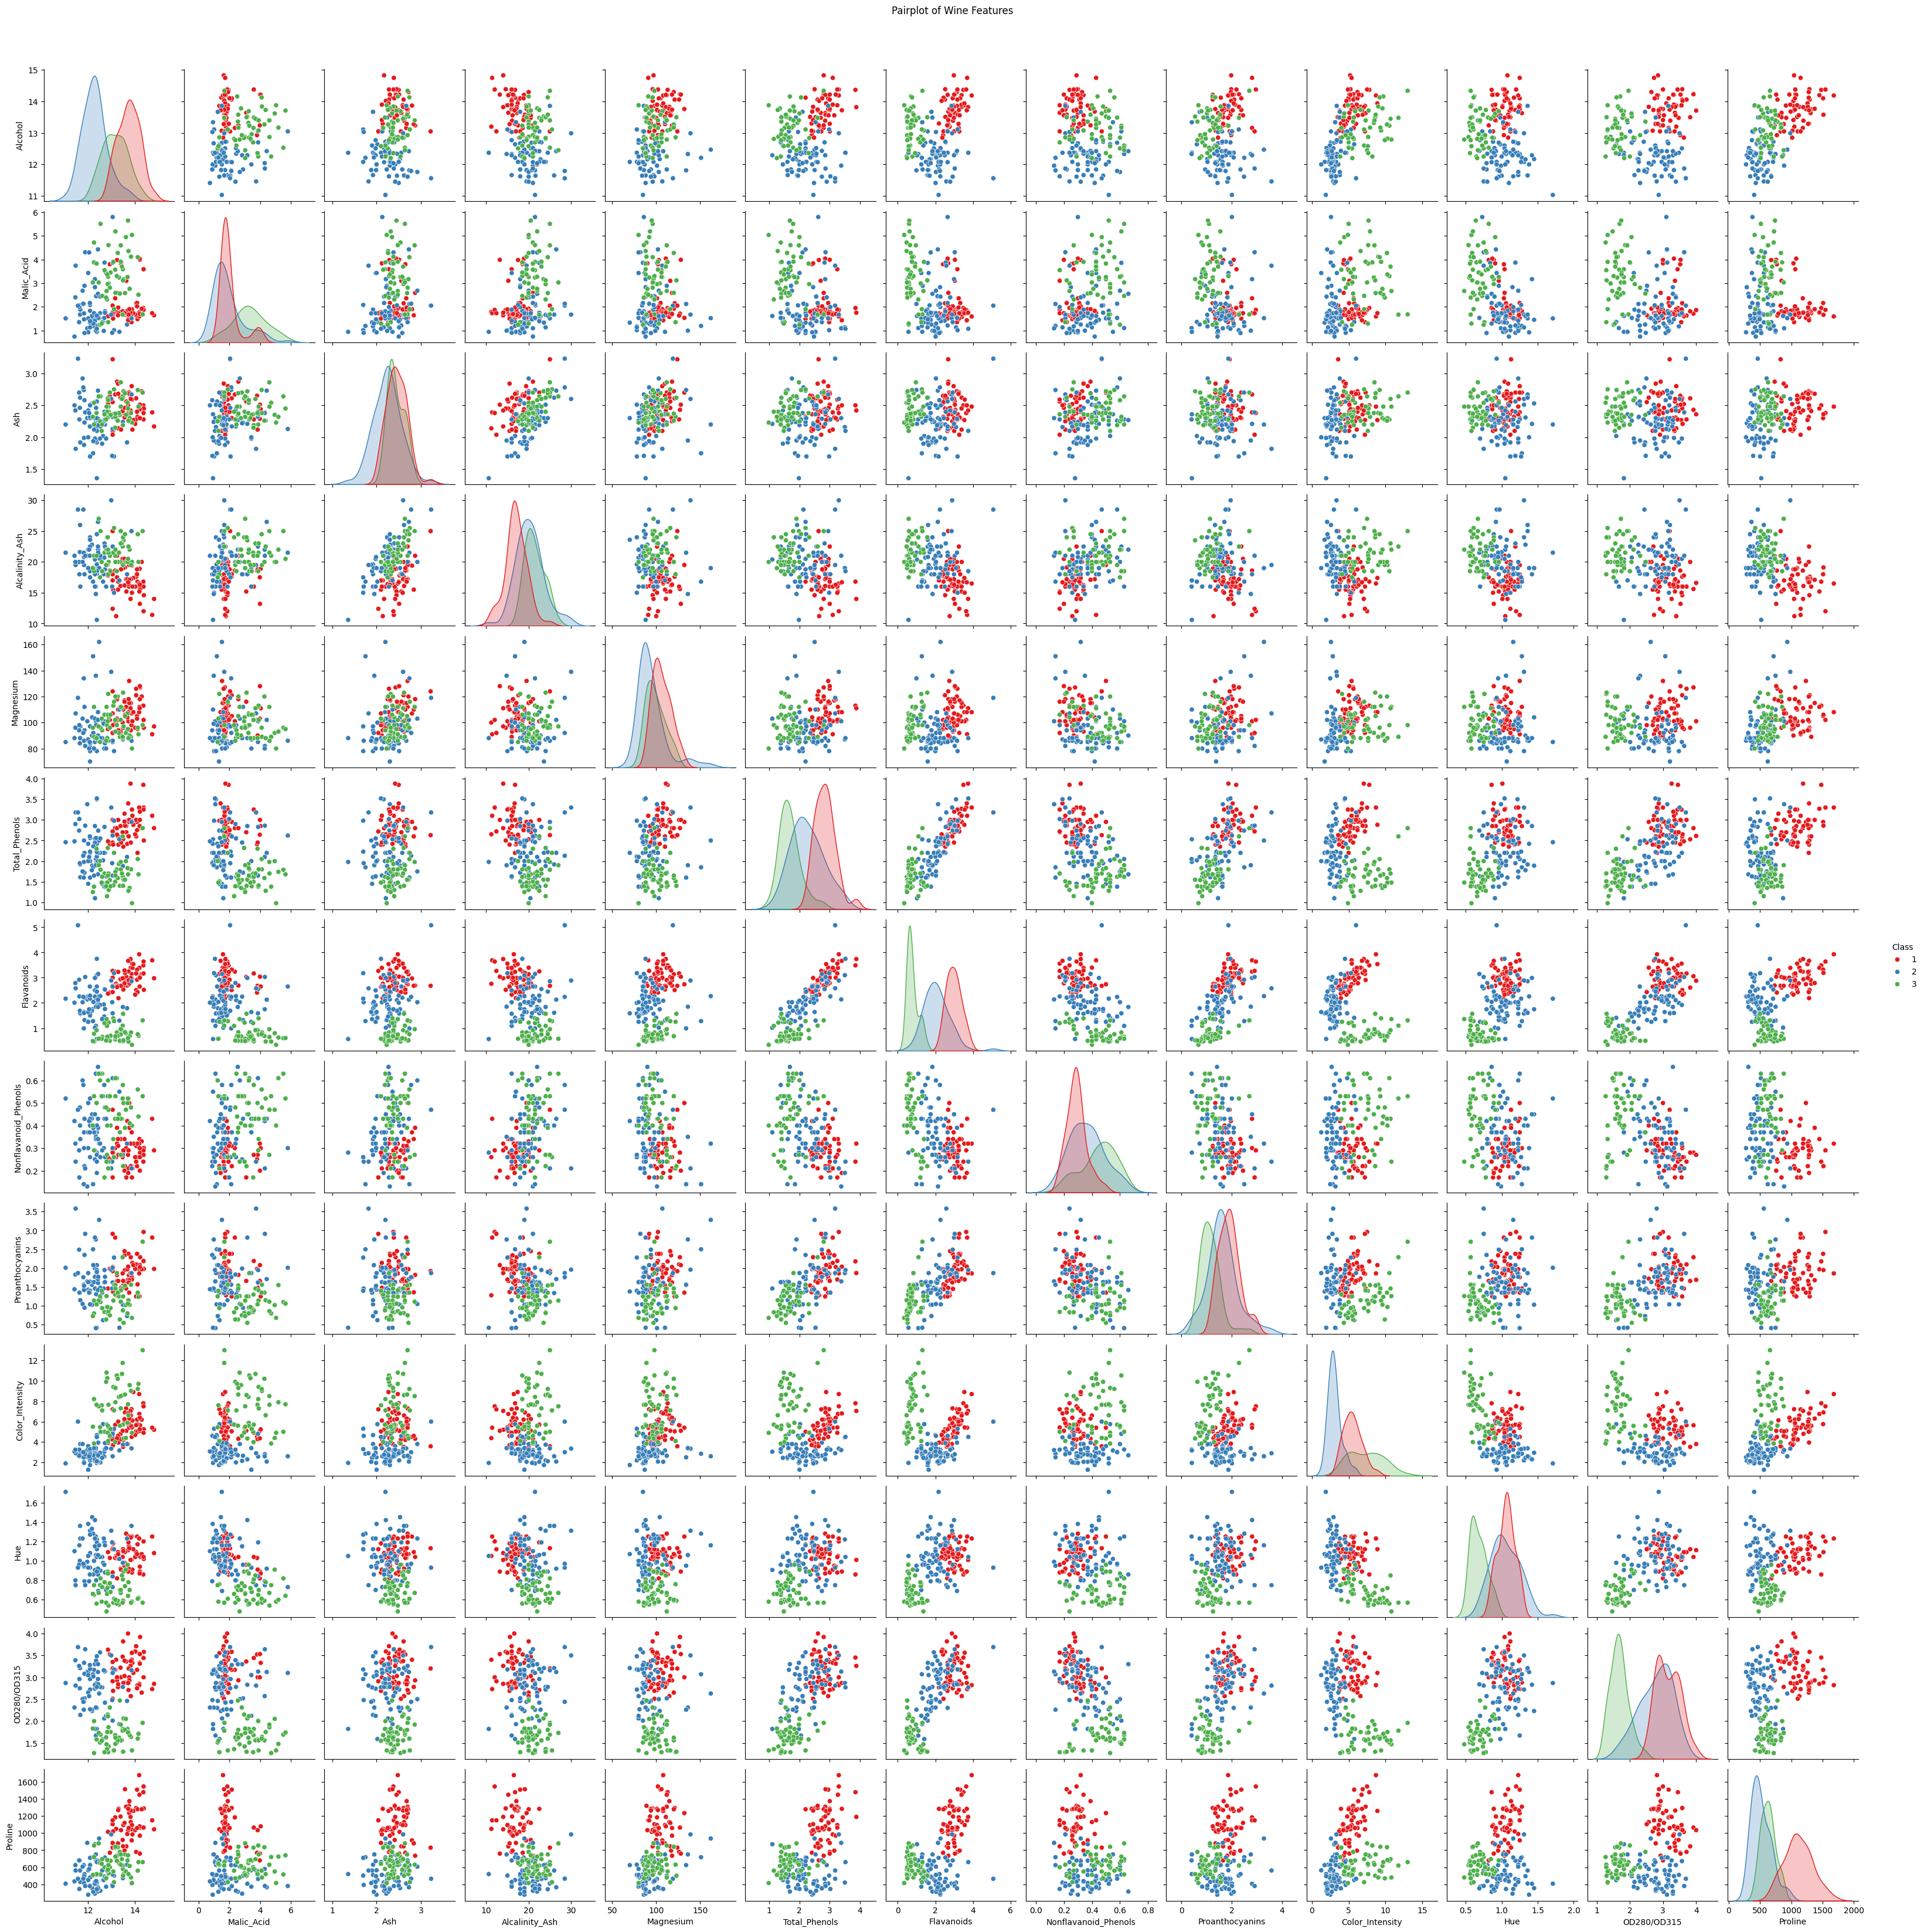

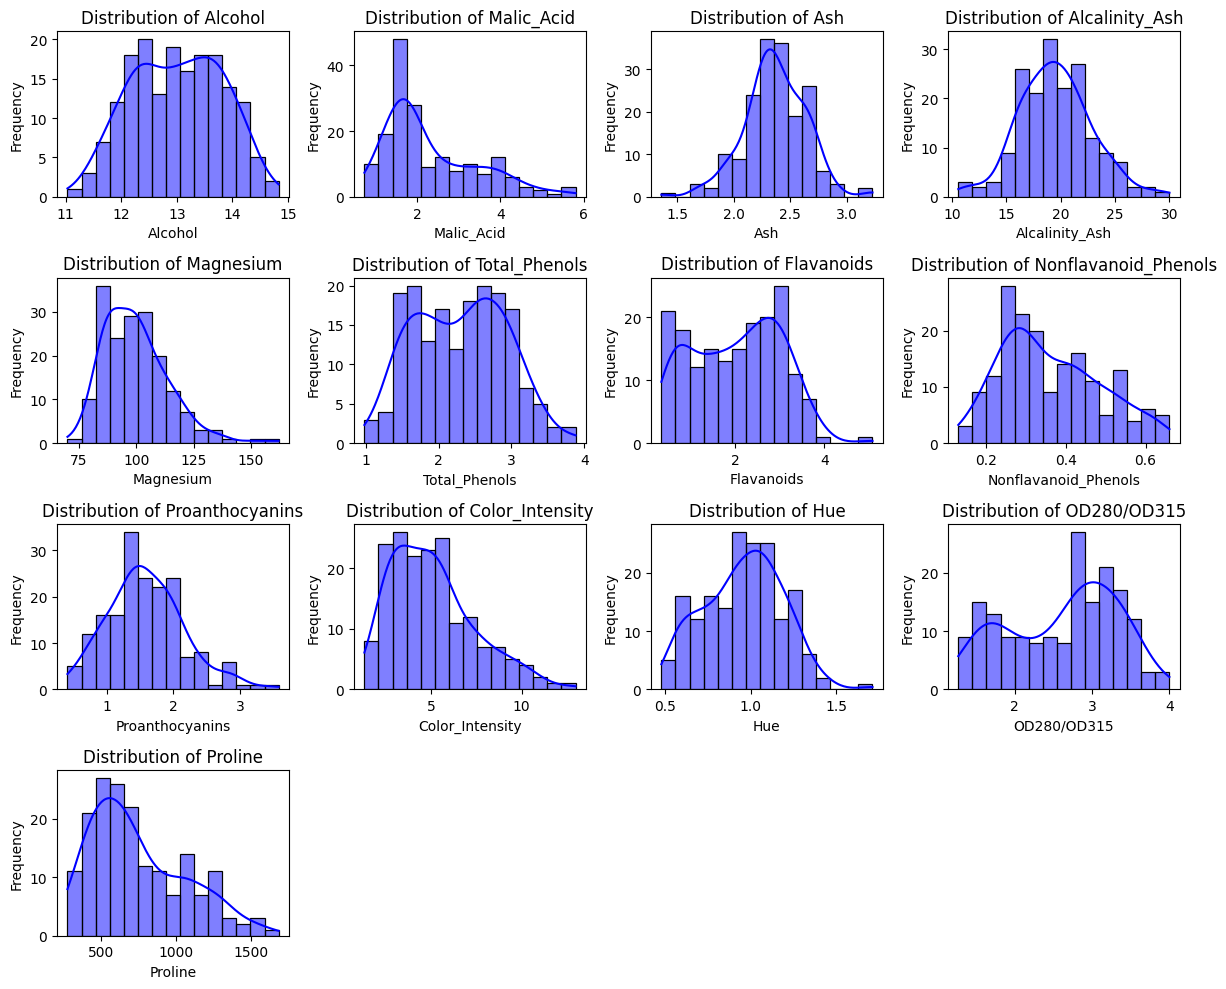

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
           'OD280/OD315', 'Proline']
data = pd.read_csv(url, names=columns)

# Features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Pairplot for feature relationships
sns.pairplot(data, hue='Class', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Wine Features", y=1.02)
plt.show()

# Distribution plots for features
plt.figure(figsize=(12, 10))
for i, column in enumerate(X.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[column], kde=True, bins=15, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Evaluating PCA...
Accuracy with PCA (1 components): 0.8519
Accuracy with PCA (2 components): 0.9815
Accuracy with PCA (3 components): 0.9815
Accuracy with PCA (4 components): 0.9815
Accuracy with PCA (5 components): 1.0000
Accuracy with PCA (6 components): 1.0000
Accuracy with PCA (7 components): 1.0000
Accuracy with PCA (8 components): 1.0000
Accuracy with PCA (9 components): 1.0000
Accuracy with PCA (10 components): 1.0000
Accuracy with PCA (11 components): 1.0000
Accuracy with PCA (12 components): 1.0000
Accuracy with PCA (13 components): 0.9815
Best PCA Accuracy: 1.0000 with 5 components

Evaluating LDA...
Accuracy with LDA: 1.0000
Best LDA Accuracy: 1.0000 with 2 components

Evaluating ICA...
Accuracy with ICA (1 components): 0.8519
Accuracy with ICA (2 components): 0.9815
Accuracy with ICA (3 components): 1.0000
Accuracy with ICA (4 components): 0.9444
Accuracy with ICA (5 components): 1.0000
Accuracy with ICA (6 components): 1.0000
Accuracy with ICA (7 components): 1.0000
Accura

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Accuracy with ICA (9 components): 1.0000
Accuracy with ICA (10 components): 0.9259
Accuracy with ICA (11 components): 0.9630


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Accuracy with ICA (12 components): 0.9259
Accuracy with ICA (13 components): 0.8889
Best ICA Accuracy: 1.0000 with 3 components



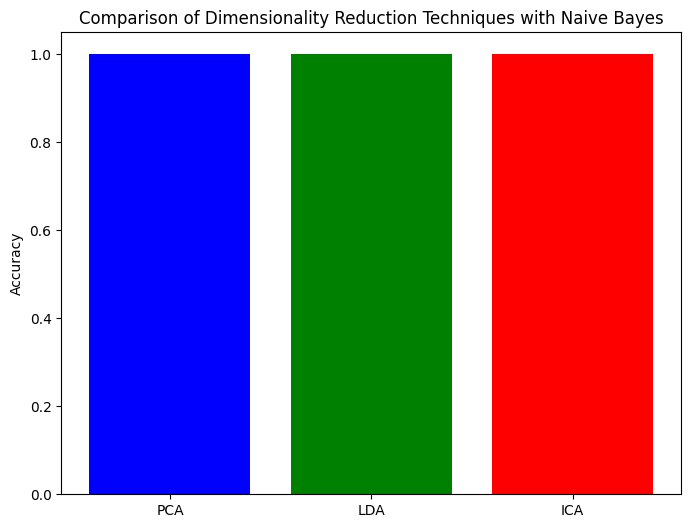

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the UCI Wine dataset from a URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_Ash', 'Magnesium', 'Total_Phenols',
           'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue',
           'OD280/OD315', 'Proline']

data = pd.read_csv(url, names=columns)

# Features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to evaluate Naive Bayes performance
def evaluate_nb(X_train, X_test, y_train, y_test, method_name):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {method_name}: {accuracy:.4f}")
    return accuracy

# ------------------ PCA ------------------
print("Evaluating PCA...")
best_pca_accuracy = 0
best_pca_components = 0
for n_components in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    acc = evaluate_nb(X_train_pca, X_test_pca, y_train, y_test, f'PCA ({n_components} components)')
    if acc > best_pca_accuracy:
        best_pca_accuracy = acc
        best_pca_components = n_components

print(f"Best PCA Accuracy: {best_pca_accuracy:.4f} with {best_pca_components} components\n")

# ------------------ LDA ------------------
print("Evaluating LDA...")
lda = LDA(n_components=2)  # LDA can only reduce to number of classes - 1 components (in this case, 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
lda_accuracy = evaluate_nb(X_train_lda, X_test_lda, y_train, y_test, 'LDA')

print(f"Best LDA Accuracy: {lda_accuracy:.4f} with 2 components\n")

# ------------------ ICA ------------------
print("Evaluating ICA...")
best_ica_accuracy = 0
best_ica_components = 0
for n_components in range(1, X_train.shape[1] + 1):
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train)
    X_test_ica = ica.transform(X_test)
    acc = evaluate_nb(X_train_ica, X_test_ica, y_train, y_test, f'ICA ({n_components} components)')
    if acc > best_ica_accuracy:
        best_ica_accuracy = acc
        best_ica_components = n_components

print(f"Best ICA Accuracy: {best_ica_accuracy:.4f} with {best_ica_components} components\n")

# ------------------ Comparison ------------------
methods = ['PCA', 'LDA', 'ICA']
accuracies = [best_pca_accuracy, lda_accuracy, best_ica_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparison of Dimensionality Reduction Techniques with Naive Bayes')
plt.ylabel('Accuracy')
plt.show()


Let's compare PCA, LDA , ICA on same number of component (2).We know number of component in LDA is bounded by (number of classes-1).So we'll evaluate for (2,1) no. of classes.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Dimensionality Reduction Techniques

# PCA
pca = PCA(n_components=2)  # Experiment with different values for n_components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# ICA
ica = FastICA(n_components=2, random_state=42)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Step 5: Apply Naive Bayes on reduced datasets

# Naive Bayes with PCA
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_pca = nb.predict(X_test_pca)
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# Naive Bayes with LDA
nb.fit(X_train_lda, y_train)
y_pred_lda = nb.predict(X_test_lda)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

# Naive Bayes with ICA
nb.fit(X_train_ica, y_train)
y_pred_ica = nb.predict(X_test_ica)
print("ICA Accuracy:", accuracy_score(y_test, y_pred_ica))
print(classification_report(y_test, y_pred_ica))

# Step 6: Conclusion


PCA Accuracy: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

LDA Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

ICA Accuracy: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Dimensionality Reduction Techniques

# PCA
pca = PCA(n_components=1)  # Experiment with different values for n_components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# ICA
ica = FastICA(n_components=1, random_state=42)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Step 5: Apply Naive Bayes on reduced datasets

# Naive Bayes with PCA
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
y_pred_pca = nb.predict(X_test_pca)
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# Naive Bayes with LDA
nb.fit(X_train_lda, y_train)
y_pred_lda = nb.predict(X_test_lda)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

# Naive Bayes with ICA
nb.fit(X_train_ica, y_train)
y_pred_ica = nb.predict(X_test_ica)
print("ICA Accuracy:", accuracy_score(y_test, y_pred_ica))
print(classification_report(y_test, y_pred_ica))

# Step 6: Conclusion


PCA Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       0.81      0.81      0.81        21
           3       0.92      0.86      0.89        14

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.86        54
weighted avg       0.85      0.85      0.85        54

LDA Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       0.90      0.86      0.88        21
           3       1.00      0.93      0.96        14

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

ICA Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       0.81      0

* **Based on above evaluation we saw**:


 PCA Accuracy: 0.9814814814814815

---

LDA Accuracy: 1.0

---

ICA Accuracy: 0.9814814814814815

---
and performance declines when number of component decreases more.
 Hence , **LDA** dimensionality reduction technique is the most effective for this dataset and **Two** is optimal number of components for this technique.